In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<font size="6" color="red"><b>ch4. 머신러닝 모형 최적화</b></font>
# 1절. 변수 선택과 차원 축소
## 1-1 변수선택과 차원축소
- 종속변수에 영향을 주는 변수들을 찾아 학습에 사용할 독립변수의 수를 줄임
 (어떻게 하면 score를 높일 수 있을지?)
- 과적합과 변수들 사이의 다중공선성(변수들간 강한 상관관계)을 줄일 수 있음
 * 회귀계수 해석이 어려워짐. 모델 예측력이 좋아도 해석력이 떨어짐(어떤 변수가 제일 큰 요인인지 잘), p값이
나 유의성 검정이 왜곡될 수 있음
- 모형의 학습 시간을 줄일 수 있음
- 주성분분석, 상관분석, **분류모형의 feature_importance_, 예측 모형의 coef_**
- SelectKBest : 가장 높은 score에 따라 K개의 특징을 선택

## 1-2 주성분분석(PCA, Principal Component Anaysis)
- 주성분분석은 변수 선택 및 차원축소 방법(기존의 모든 변수를 조합하여 새로운 변수로 만듦) 으로 널리 사용
- 주성분 분석은 상관관계가 있는 변수들을 선형결합해서 **분산이 극대화된 상관관계가 없는 새로운 변수(주성분)
들로 축약**하는 것
- 주성분 분석은 사실 선형대수학이라기보다는 선형대수학의 활용적인 측면이 강하며 영상인식, 통계 데이터분석
(주성분 찾기), 데이터 압축, 노이즈제거 등 여러 분야에 사용
- 영상처리에서 많이 활용 : 여러개의 영상 중 대표 이미지를 찾을 때 활용

In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:,:-1], iris.species
iris_X.shape, iris_y.shape

((150, 4), (150,))

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components : 주성분 갯수
iris_pca = pca.fit_transform(iris_X)
iris_pca[:3] # 뽑혀진 주성분 3개

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

In [8]:
import pandas as pd
pd.DataFrame(iris_pca, columns=['pca1', 'pca2']).corr() # 주성분끼리의 상관관계

,pca1,pca2
pca1,1.000000e+00,3.722081e-16
pca2,3.722081e-16,1.000000e+00


In [9]:
# 설명분산 : 각 주성분이 데이터 분산을 잘 표현하는지 (정보량), 값이 클수록 더 중요한 주성분
pca.explained_variance_

array([4.22824171, 0.24267075])

In [10]:
# 설명정도 : 0~1사이의 비율로 조정된 값
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [11]:
pca.components_
# 각 주성분이의 계수 : 각 주성분이 원래 특성과 어떤 관계가 있는지 나타내는 가중치
# pca1 = 0.36138659*sepal_length + -0.08452251*sepal_width + 0.85667061*petal_length + 0.3582892*petal_width
# pca2 = 0.65658877*sepal_length + 0.73016143*sepal_width + -0.17337266*petal_length + -0.07548102*petal_width

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

## 1-3 상관관계 확인
- 각 변수들끼리 상관관계를 확인하고 시각화해서 종속변수와 상관관계각 높은 변수들만 선택

In [13]:
import pandas as pd
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


cmap의 종류 : 
- https://jrc-park.tistory.com/155
- http://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
- http://seaborn.pydata.org/examples/many_pairwise_correlations.html

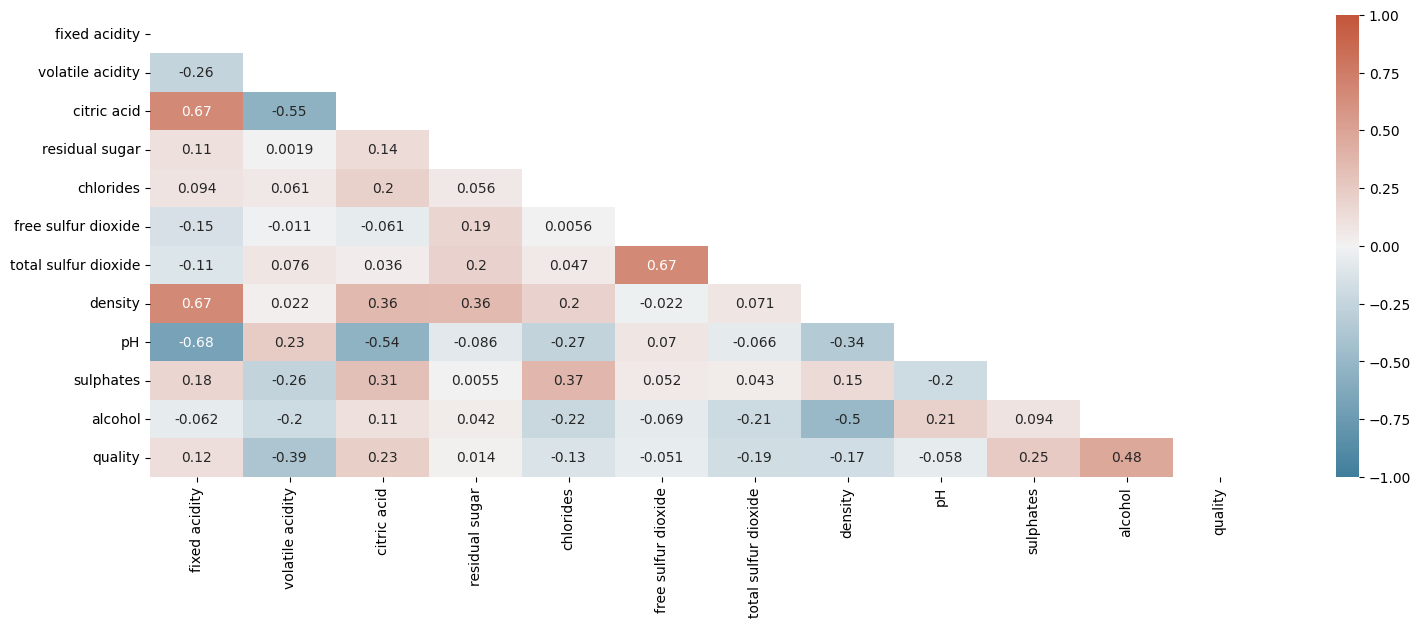

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(18,6))
corr = redwine.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool)) # k값으로 대각선 포함이나 shift를 조절 가능
sns.heatmap(corr, cmap=cmap, annot=True, vmin=-1, vmax=1, mask=mask)
plt.show()

## 1-4 분류모형의 Feature Importance
- 분류모형의 feature_importance_ 속성 : 각 독립변수들의 종속변수에 영향을 주는 정도
- DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, ... (tree 계열)
- LogisticRegression, SVC, MLPClassifier ... 등은 feature_importance_ 속성은 없음

In [34]:
from sklearn.model_selection import train_test_split
X = redwine.iloc[:, :-1]
y = redwine.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.3)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, #의사결정 tree의 수
                                 random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [36]:
rf_model.score(test_X, test_y) # accuracy

0.6583333333333333

In [37]:
rf_model.feature_importances_

array([0.06714881, 0.09637483, 0.07314709, 0.0786525 , 0.09522172,
       0.06685131, 0.10101234, 0.08273365, 0.0796722 , 0.11056561,
       0.14861995])

In [41]:
features = pd.DataFrame(np.c_[X.columns, rf_model.feature_importances_], columns=['feature', 'importance'])
features

,feature,importance
0,fixed acidity,0.067149
1,volatile acidity,0.096375
2,citric acid,0.073147
3,residual sugar,0.078652
4,chlorides,0.095222
5,free sulfur dioxide,0.066851
6,total sulfur dioxide,0.101012
7,density,0.082734
8,pH,0.079672
9,sulphates,0.110566


In [45]:
features.sort_values(by='importance', ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,alcohol,0.14862
1,sulphates,0.110566
2,total sulfur dioxide,0.101012
3,volatile acidity,0.096375
4,chlorides,0.095222
5,density,0.082734
6,pH,0.079672
7,residual sugar,0.078652
8,citric acid,0.073147
9,fixed acidity,0.067149


### feature_importances_를 이용한 변수 중요도 시각화

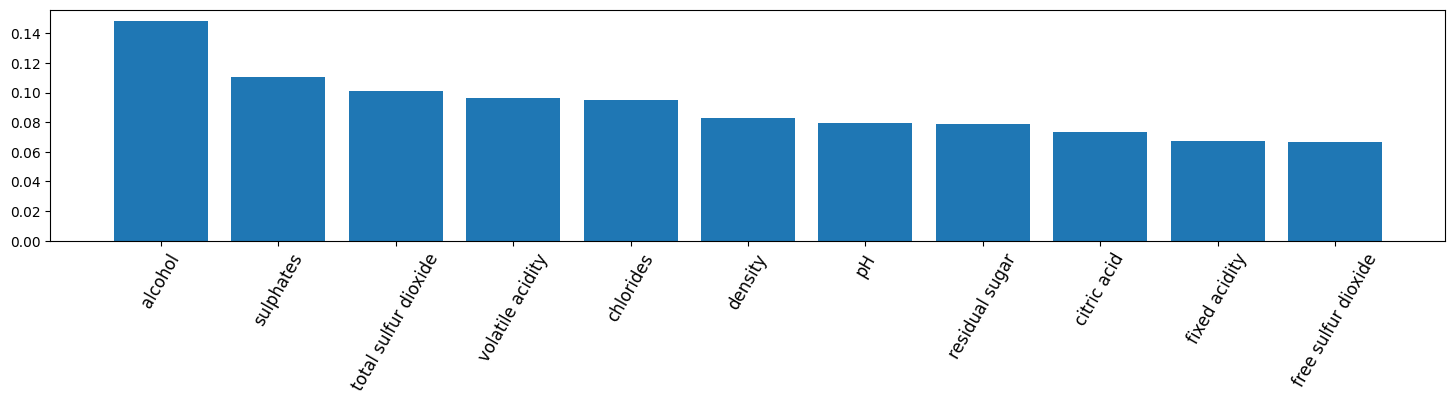

In [49]:
# features를 시각화
plt.figure(figsize=(18,3))
plt.bar(features.feature, features.importance)
plt.xticks(fontsize=12, rotation=60)
plt.show()

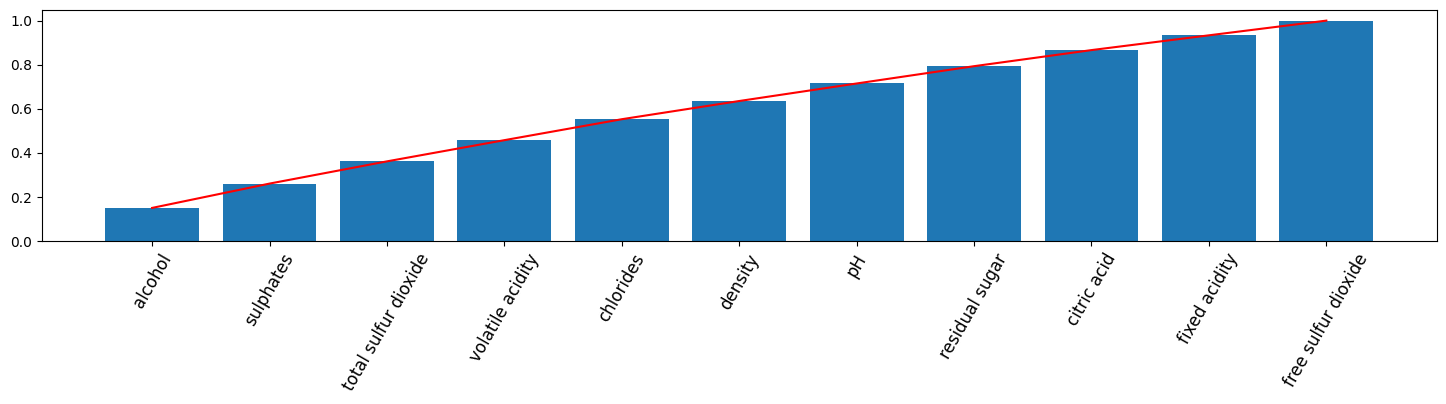

In [52]:
# 누적합을 이용한 시각화
y_stack = np.cumsum(features.importance)
plt.figure(figsize=(18,3))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color='red')
plt.xticks(fontsize=12, rotation=60)
plt.show()

### RFE (Recursive Feature Elimination) 방식
- RFE를 이용하며 중요도에 따라 중요도가 낮은 변수부터 하나씩 제거해 나가면서 최종적으로 선택한 변수를 찾는다

In [53]:
from sklearn.feature_selection import RFE
rfe_model = RFE(RandomForestClassifier(n_estimators=10, random_state=10),
                n_features_to_select=5, # 제거후 남길 feature의 수
                )
rfe_model.fit(train_X, train_y)
rfe_model.get_support() # 선택된 변수(True)인지 제거된 변수(False)인지 여부

array([False, False, False, False,  True, False,  True,  True, False,
        True,  True])

In [55]:
features_rfe = pd.DataFrame(np.c_[X.columns, rfe_model.get_support()], columns=['feature', 'selected'])
features_rfe

,feature,selected
0,fixed acidity,False
1,volatile acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,True
5,free sulfur dioxide,False
6,total sulfur dioxide,True
7,density,True
8,pH,False
9,sulphates,True


## 1-5 SelectKBest
- 가장 높은 score에 따라 k개 특징변수 선택


In [59]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif, chi2
# f_classif : ANNOVA F 검정 - 독립변수가 연속형(그룹간 차이가 유의미한지)
# chi2      : 카이제곱 통계량 검정 - 독립변수가 범주형 (타겟변수도 범주형) 또는 양의 정수
X,y = load_iris(return_X_y=True)
X_new = SelectKBest(f_classif, k=1).fit_transform(X, y)

In [60]:
X_new[:3] # petal_length

array([[1.4],
       [1.4],
       [1.3]])

In [61]:
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

# 2절 파라미터 탐색
- 하이퍼파라미터(모델의 성능에 영향을 미칠수 있는 사용자가 직접 설정하는 파라미터).
- 어떤 파라미터를 사용하는게 최적의 결과를 낼지 탐색
- sklearn 패키지의 하이퍼 파라미터 튜닝 도구
    - validation_curve() : 단일 하이퍼 파라미터 최적화 함수
    - GridSearchCV : 복수 하이퍼파라미터 최적화 클래스
   
## 2-1 validation_curve
- 모형, 데이터(독립, 종속), 파라미터 이름, 파라미터 값 리스트, 교차검증, scoring기준

In [113]:
# 데이터
from sklearn.datasets import load_digits
digits = load_digits()
# digits.data # 1797*64 크기의 배열 8x8의 이미지 데이터
# digits.target # 1797 크기의 배열 (0~9중 하나)
# digits.images.shape # 1797x8x8 크기의 배열(이미지형태)
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [65]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

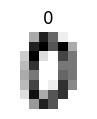

In [72]:
plt.figure(figsize=(1,1))
plt.imshow(X[0].reshape(8,8), cmap='gray_r')
plt.axis('off')
plt.title(y[0])
plt.show()

In [73]:
from sklearn.svm import SVC
model = SVC(probability=True).fit(X,y) # 기본파라미터로 모형 생성

In [77]:
test_x = X[0].reshape(1,-1)
hat = model.predict(test_x)
print('예측 :', hat, ' 실제 :', y[0])

예측 : [0]  실제 : 0


In [82]:
prob = model.predict_proba(test_x)[0]
classes = model.classes_
# print('확률 :', model.predict_proba(test_x))
for c, p in zip (classes, prob):
    print("{}일 확률 : {:.5f}".format(c,p*100))

0일 확률 : 99.12204
1일 확률 : 0.01911
2일 확률 : 0.05025
3일 확률 : 0.08645
4일 확률 : 0.06090
5일 확률 : 0.13554
6일 확률 : 0.07243
7일 확률 : 0.09556
8일 확률 : 0.07504
9일 확률 : 0.28268


In [83]:
# 하이퍼파라미터 탐색전 score
model.score(X,y)

0.996661101836394

In [85]:
# SVC() 모형의 최적의 gamma값 탐색
import numpy as np
param_range = np.logspace(-6,-1,10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [86]:
%%time
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(SVC(), #예측모형
                                             X, y, # 데이터(독립, 종속)
                                             param_name="gamma", # gamma가 크면 결정경계가 복잡 (오버피팅이 일어날수 있음), 작으면 너무 못 맞출가능성이 있음
                                             param_range=param_range, #param_names를 테스트할 값들
                                             cv=10, #교차검증 수
                                             scoring='accuracy', # 평가 기준 : accuracy, precision, recall, balanced_accuracy(불균형을 고려한 정확도) 등이 가능
                                             n_jobs=-1 #사용할 코어 수 -1은 모든 코어
                                            )

CPU times: total: 391 ms
Wall time: 9.88 s


In [93]:
train_scores.shape, test_scores.shape

((10, 10), (10, 10))

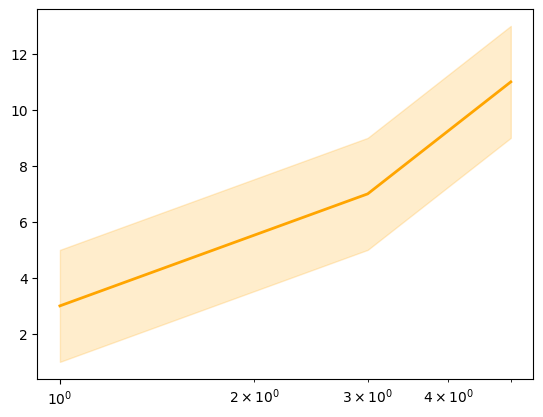

In [97]:
a = np.array([1, 3, 5]) # 10의 1승, 10의 3승, 10의 5승
b = np.array([3, 7, 11]) # 3, 7, 11
plt.semilogx(x, y, color='orange', lw=2)
plt.fill_between(x, y-2, y+2, color='orange', alpha=0.2)

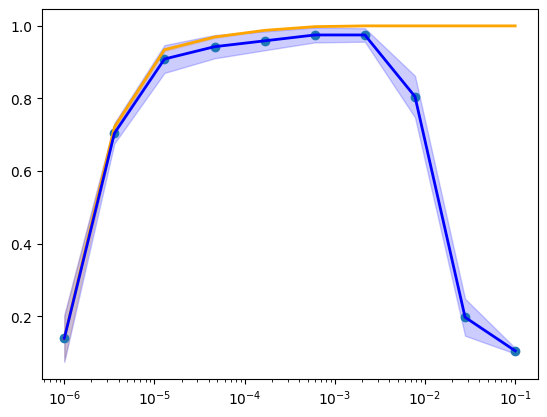

In [110]:
# validation curve 그래프 만들기
train_scores_mean = np.mean(train_scores, axis=1) # train 평균
train_scores_std = np.std(train_scores, axis=1) # train 표준편차
test_scores_mean = np.mean(test_scores, axis=1) # test 평균
test_scores_std = np.std(test_scores, axis=1) # test 표준편차

plt.semilogx(param_range, train_scores_mean, color='orange', lw=2)
plt.fill_between(param_range, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color='orange', alpha=0.2)
plt.semilogx(param_range, test_scores_mean, color='blue', lw=2)
plt.fill_between(param_range, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, color='blue', alpha=0.2)
plt.scatter(param_range, test_scores_mean)
plt.show()

In [111]:
train_scores_mean.argmax()

6

In [112]:
# 최적의 gamma
gamma = param_range[test_scores_mean.argmax()]
gamma

0.0021544346900318843

In [114]:
model = SVC(gamma=gamma).fit(X,y)

In [115]:
model.score(X,y)

1.0

## 2-2 GridSearchCV
- 복수 hyperparameter 최적화 클래스
- 모형 클래스를 가지고 있음
- fit()/predict()/socre()/predcit_proba()/predict_log_proba()

In [116]:
import pandas as pd
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_X = redwine.iloc[:, :-1]
redwine_y = redwine.iloc[:, -1]
redwine_X.shape, redwine_y.shape

((1599, 11), (1599,))

In [117]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

In [118]:
%%time
# 가장 평가 점수가 높은 독립변수 ?개 선택, SVC() 모형의 최적의 C=?
selection = SelectKBest(k=1) # 가장 평가 점수가 높은 k개를 찾음
svc = SVC(kernel='linear') # 직선으로 나누는 가장 단순한 decision_function을 생성
pipeline = Pipeline([('select', selection),('svc', svc)])
param_grid = dict(select__k = [5,6,7,8,9,10,11], svc__C=[0.1, 1, 10])
grid_search = GridSearchCV(pipeline, 
                           param_grid=param_grid, # 파라미터들
                           cv=2, # 교차검증
                           n_jobs=-1, verbose=2)
grid_search.fit(redwine_X, redwine_y)

Fitting 2 folds for each of 21 candidates, totalling 42 fits
CPU times: total: 13.2 s
Wall time: 1min 34s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('select', SelectKBest(k=1)),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'select__k': [5, 6, 7, 8, 9, 10, 11],
                         'svc__C': [0.1, 1, 10]},
             verbose=2)

In [119]:
print(grid_search.best_estimator_) # 가장 높은 점수를 낸 파라미터 모형

Pipeline(steps=[('select', SelectKBest(k=9)),
                ('svc', SVC(C=1, kernel='linear'))])


In [120]:
model = grid_search.best_estimator_
model.predict(redwine_X)

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [121]:
model.score(redwine_X, redwine_y)

0.5872420262664165

In [122]:
# 기본 SVC model
model = SVC().fit(redwine_X, redwine_y)
model.score(redwine_X, redwine_y)

0.5103189493433395

# 3절 자료 불균형 처리
- 단순 오버/언더 샘플링
- 단, 단순 오버샘플시 소스의 데이터를 복사하면 그 데이터들에 의해 과적합이 생길 수 있음
- SMOTE 라이브러리를 이용한 오버샘플링

## 3-1 SMOTE를 이용한 오버샘플링

In [124]:
# 데이터 (99%:1%)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=42, weights=[0.99, 0.01])
X.shape, y.shape, y.sum()

((10000, 10), (10000,), 140)

In [125]:
# train-test 셋 분리 -> SMOTE(train 데이터) -> 모델 fit(train 데이터) -> score(test 데이터)
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [129]:
print(train_y.mean()) # 1이 1.4%
pd.Series(train_y).value_counts()

0.014


0    6902
1      98
dtype: int64

In [132]:
# SMOTE(train데이터)
# pip install imbalanced-learn==0.10.1
from imblearn.over_sampling import SMOTE
# sm = SMOTE(sampling_strategy={0:6902, 1:600})
sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(train_X, train_y)

In [133]:
pd.Series(y_resampled).value_counts()

0    6902
1    6902
dtype: int64

## 3-2 가중치 제어 모형
- 자료 불균형 처리의 또 다른 방법
- 모델에 데이터 따른 가중치 부여 방법

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight={0:1, 1:1.5}, random_state=42) #가중치 부여
rf_model.fit(train_X, train_y)

RandomForestClassifier(class_weight={0: 1, 1: 1.5}, random_state=42)

# 4절. 앙상블 모형
- 목적 : 여러개 분류 모델을 하나의 통합 분류모델로 연결하여 개별 분류모델보다 더 좋은 성능 달성
- 방법 : 
    - 배깅(bagging) : 분류를 잘하는 모델에 가중치 (병렬작업) ex) RandomForest
    - 부스팅(boosting) : 분류가 안된 데이터에 가중치(순차작업) ex) XGBoost, LGBM, AdaBoost - 불균형 데이터에 적합
    - 투표(Voting) : 여러 모델의 다수결 투표

## 배깅
- cf. 배깅 알고리즘시 복원 추출을
    - 0.632 규칙 : 복원추출시 63.2% 추출

In [137]:
np.random.choice(10, 10, replace=True) # 복원추출로 10미마의 수를 10개 추출

array([2, 5, 4, 1, 0, 7, 6, 4, 1, 8])

In [143]:
# 10 미만의 수 10개 복원추출할 경우 뽑히는 수의 갯수
len(set(np.random.choice(10, 10, replace=True)))

7

In [150]:
# 1000 미만의 수 10개 복원추출할 경우 뽑히는 수의 갯수
len(set(np.random.choice(1000, 1000, replace=True)))

651

In [153]:
# n 미만의 수 n개 복원추출할 경우의 데이터 퍼센트
n=100000
len(set(np.random.choice(n, n, replace=True)))

63257

In [155]:
# 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=0, n_clusters_per_class=1, n_classes=2, weights=[0.9, 0.1], random_state=42)



In [156]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(train_X, train_y)
x_resampled.shape, y_resampled.shape

((12556, 10), (12556,))

In [158]:
from sklearn.metrics import precision_score, recall_score, f1_score
def model_measure(model, train_X=x_resampled, train_y=y_resampled, test_X=test_X, test_y=test_y):
    model.fit(train_X, train_y)
    accuracy = model.score(test_X, test_y)
    hat_y = model.predict(test_X)
    precision = precision_score(test_y, hat_y)
    recall  = recall_score(test_y, hat_y)
    f1 = f1_score(test_y, hat_y)
    print(f'정확도 : {accuracy:.4f}, precision: {precision:.4f}, recall: {recall:.4f}, f1:{f1:.4f}')

In [159]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model_measure(model)

정확도 :0.9823, precision:0.9295, recall0.8964, f1:0.9127


In [160]:
from sklearn.ensemble import BaggingClassifier
model_measure(BaggingClassifier(n_estimators=500, bootstrap=True)) # 복원추출

정확도 :0.9770, precision:0.8822, recall0.8964, f1:0.8892


## 부스팅
- AdaBoost, XGB, LightGBM, CatBoost

In [161]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [162]:
model_measure(AdaBoostClassifier())

정확도 :0.9600, precision:0.7507, recall0.9159, f1:0.8251


In [163]:
model_measure(XGBClassifier())

정확도 :0.9870, precision:0.9623, recall0.9094, f1:0.9351


In [165]:
model_measure(LGBMClassifier(force_col_wise=True))

[LightGBM] [Info] Number of positive: 6278, number of negative: 6278
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
정확도 :0.9867, precision:0.9590, recall0.9094, f1:0.9336


In [164]:
model_measure(CatBoostClassifier())

Learning rate set to 0.030349
0:	learn: 0.6524271	total: 142ms	remaining: 2m 21s
1:	learn: 0.6097286	total: 151ms	remaining: 1m 15s
2:	learn: 0.5685276	total: 157ms	remaining: 52.2s
3:	learn: 0.5374808	total: 163ms	remaining: 40.7s
4:	learn: 0.5069747	total: 169ms	remaining: 33.7s
5:	learn: 0.4740354	total: 176ms	remaining: 29.1s
6:	learn: 0.4489633	total: 184ms	remaining: 26.1s
7:	learn: 0.4235191	total: 190ms	remaining: 23.6s
8:	learn: 0.4052272	total: 196ms	remaining: 21.6s
9:	learn: 0.3863833	total: 202ms	remaining: 20s
10:	learn: 0.3671642	total: 210ms	remaining: 18.8s
11:	learn: 0.3477616	total: 217ms	remaining: 17.9s
12:	learn: 0.3308729	total: 225ms	remaining: 17.1s
13:	learn: 0.3176117	total: 232ms	remaining: 16.3s
14:	learn: 0.3051888	total: 238ms	remaining: 15.6s
15:	learn: 0.2909397	total: 246ms	remaining: 15.1s
16:	learn: 0.2796253	total: 252ms	remaining: 14.6s
17:	learn: 0.2683486	total: 259ms	remaining: 14.1s
18:	learn: 0.2591941	total: 265ms	remaining: 13.7s
19:	learn: 

183:	learn: 0.0601105	total: 1.45s	remaining: 6.41s
184:	learn: 0.0599431	total: 1.45s	remaining: 6.39s
185:	learn: 0.0597128	total: 1.46s	remaining: 6.38s
186:	learn: 0.0595379	total: 1.47s	remaining: 6.37s
187:	learn: 0.0592171	total: 1.47s	remaining: 6.37s
188:	learn: 0.0590070	total: 1.48s	remaining: 6.35s
189:	learn: 0.0588935	total: 1.49s	remaining: 6.34s
190:	learn: 0.0586603	total: 1.49s	remaining: 6.32s
191:	learn: 0.0584954	total: 1.5s	remaining: 6.31s
192:	learn: 0.0583559	total: 1.51s	remaining: 6.3s
193:	learn: 0.0582303	total: 1.51s	remaining: 6.29s
194:	learn: 0.0580395	total: 1.52s	remaining: 6.27s
195:	learn: 0.0578630	total: 1.52s	remaining: 6.26s
196:	learn: 0.0575197	total: 1.53s	remaining: 6.24s
197:	learn: 0.0573803	total: 1.54s	remaining: 6.23s
198:	learn: 0.0572123	total: 1.54s	remaining: 6.22s
199:	learn: 0.0570663	total: 1.55s	remaining: 6.21s
200:	learn: 0.0568773	total: 1.56s	remaining: 6.2s
201:	learn: 0.0567331	total: 1.56s	remaining: 6.18s
202:	learn: 0.0

364:	learn: 0.0341465	total: 2.69s	remaining: 4.67s
365:	learn: 0.0340722	total: 2.69s	remaining: 4.66s
366:	learn: 0.0339775	total: 2.7s	remaining: 4.66s
367:	learn: 0.0338644	total: 2.71s	remaining: 4.65s
368:	learn: 0.0337435	total: 2.71s	remaining: 4.64s
369:	learn: 0.0336879	total: 2.72s	remaining: 4.63s
370:	learn: 0.0335879	total: 2.73s	remaining: 4.62s
371:	learn: 0.0334535	total: 2.73s	remaining: 4.61s
372:	learn: 0.0334018	total: 2.74s	remaining: 4.61s
373:	learn: 0.0333321	total: 2.75s	remaining: 4.6s
374:	learn: 0.0332773	total: 2.75s	remaining: 4.59s
375:	learn: 0.0332477	total: 2.76s	remaining: 4.58s
376:	learn: 0.0331423	total: 2.77s	remaining: 4.57s
377:	learn: 0.0330701	total: 2.77s	remaining: 4.56s
378:	learn: 0.0329585	total: 2.79s	remaining: 4.56s
379:	learn: 0.0329020	total: 2.79s	remaining: 4.55s
380:	learn: 0.0328344	total: 2.8s	remaining: 4.54s
381:	learn: 0.0327275	total: 2.81s	remaining: 4.54s
382:	learn: 0.0326728	total: 2.81s	remaining: 4.53s
383:	learn: 0.0

543:	learn: 0.0205718	total: 3.91s	remaining: 3.28s
544:	learn: 0.0204925	total: 3.92s	remaining: 3.27s
545:	learn: 0.0204526	total: 3.93s	remaining: 3.27s
546:	learn: 0.0204234	total: 3.93s	remaining: 3.26s
547:	learn: 0.0204000	total: 3.94s	remaining: 3.25s
548:	learn: 0.0203677	total: 3.95s	remaining: 3.24s
549:	learn: 0.0203228	total: 3.95s	remaining: 3.23s
550:	learn: 0.0202877	total: 3.96s	remaining: 3.23s
551:	learn: 0.0202528	total: 3.97s	remaining: 3.22s
552:	learn: 0.0202331	total: 3.97s	remaining: 3.21s
553:	learn: 0.0202202	total: 3.98s	remaining: 3.2s
554:	learn: 0.0201849	total: 3.99s	remaining: 3.2s
555:	learn: 0.0201350	total: 3.99s	remaining: 3.19s
556:	learn: 0.0200602	total: 4s	remaining: 3.18s
557:	learn: 0.0200297	total: 4s	remaining: 3.17s
558:	learn: 0.0199921	total: 4.01s	remaining: 3.17s
559:	learn: 0.0199077	total: 4.02s	remaining: 3.16s
560:	learn: 0.0198593	total: 4.03s	remaining: 3.15s
561:	learn: 0.0198123	total: 4.03s	remaining: 3.14s
562:	learn: 0.019784

729:	learn: 0.0138729	total: 5.16s	remaining: 1.91s
730:	learn: 0.0138329	total: 5.16s	remaining: 1.9s
731:	learn: 0.0138257	total: 5.17s	remaining: 1.89s
732:	learn: 0.0137918	total: 5.18s	remaining: 1.89s
733:	learn: 0.0137491	total: 5.18s	remaining: 1.88s
734:	learn: 0.0137420	total: 5.19s	remaining: 1.87s
735:	learn: 0.0137047	total: 5.2s	remaining: 1.86s
736:	learn: 0.0136854	total: 5.2s	remaining: 1.86s
737:	learn: 0.0136650	total: 5.21s	remaining: 1.85s
738:	learn: 0.0136012	total: 5.22s	remaining: 1.84s
739:	learn: 0.0135944	total: 5.22s	remaining: 1.83s
740:	learn: 0.0135611	total: 5.23s	remaining: 1.83s
741:	learn: 0.0135333	total: 5.24s	remaining: 1.82s
742:	learn: 0.0135008	total: 5.24s	remaining: 1.81s
743:	learn: 0.0134733	total: 5.25s	remaining: 1.81s
744:	learn: 0.0134358	total: 5.26s	remaining: 1.8s
745:	learn: 0.0133847	total: 5.26s	remaining: 1.79s
746:	learn: 0.0133279	total: 5.27s	remaining: 1.78s
747:	learn: 0.0133054	total: 5.28s	remaining: 1.78s
748:	learn: 0.01

918:	learn: 0.0102590	total: 6.39s	remaining: 563ms
919:	learn: 0.0102590	total: 6.4s	remaining: 556ms
920:	learn: 0.0102447	total: 6.4s	remaining: 549ms
921:	learn: 0.0102332	total: 6.41s	remaining: 543ms
922:	learn: 0.0102262	total: 6.42s	remaining: 535ms
923:	learn: 0.0102262	total: 6.42s	remaining: 528ms
924:	learn: 0.0102100	total: 6.43s	remaining: 521ms
925:	learn: 0.0102100	total: 6.43s	remaining: 514ms
926:	learn: 0.0102001	total: 6.44s	remaining: 507ms
927:	learn: 0.0101943	total: 6.45s	remaining: 500ms
928:	learn: 0.0101816	total: 6.45s	remaining: 493ms
929:	learn: 0.0101656	total: 6.46s	remaining: 486ms
930:	learn: 0.0101656	total: 6.46s	remaining: 479ms
931:	learn: 0.0101535	total: 6.47s	remaining: 472ms
932:	learn: 0.0101367	total: 6.48s	remaining: 465ms
933:	learn: 0.0100947	total: 6.49s	remaining: 458ms
934:	learn: 0.0100767	total: 6.49s	remaining: 451ms
935:	learn: 0.0100486	total: 6.5s	remaining: 444ms
936:	learn: 0.0100363	total: 6.5s	remaining: 437ms
937:	learn: 0.01